<a href="https://colab.research.google.com/github/Gabriel-Mourad/Practica_2_INAM/blob/main/Copia_de_Students_INAM_02_classification_part_one_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ambient intelligence

In this lab session we are going to learn about:

1. Linear models for classification: Least squares and Fisher Discriminant.
2. The perceptron.
3. Multilayer perceptron and the Backpropagation algorithm.

If interested on the subject, a good summary for classification methods can be found [here](https://www.microsoft.com/en-us/research/wp-content/uploads/1996/01/neural_networks_pattern_recognition.pdf)

## Linear models for classification
![Linear](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fe/Kernel_Machine.svg/1200px-Kernel_Machine.svg.png)
The goal in classification is to take an input vector **$x$** and assign it to one of K discrete classes $C_k$ where $k=1,...,K$. Commonly each of the input vectors can only be assigned (belong) to one and only one class and that the characteristics (features) of each individual (observation) can help in order to classify it to belong to one class or another. This means that observations of the same class will usually reside in the same region of the input space and what we need is to create "regions" in the input space that permit to separate individuals from one class from individuals in another class. In this context, the input space is divided into decision regions whose boundaries are called *decision boundaries* or *decision surfaces*.
When we talk about linear models for classification, we refer to the fact that the decision boundaries are linear functions of the input vector **$x$**, defined by (D-1)-dimensional hyperplanes within a D-dimensional input space. Data sets in which classes can be separated exactly by linear decision boundaries are said to be *linearly separable*.

The representation of the target (dependent variable) $y$ for two-class problems is $y\in\{0,1\}$ where $y=1$ represents class $C_1$ and $y=0$ represents class $C_2$. For $K>2$ it is convenient to use a 1-of$K$ coding scheme also known as one hot encoding. In this case $y$ becomes a vector with as many elements as classes there are in the data set. All elements will have value of zero with the exception of the element **$y_j$** which takes value 1 and indicates the class that the input vector belongs. For instance, if we have $K=5$ classes, then an input vector **$x$** corresponding to the class 2 would be given by the target vector $y=(0,1,0,0,0)^T$.
This representation can be interpreted as that the value of **$y$** is the probability of the input vector to belong to the class $j$ (same happens in the two-class problem). Bear in mind that depending on the approach used by the classifier this representation can be different.

There exists three approaches to the classification problems:


1.   Use of discriminant functions that assign each input vector to a class.
2.   Use of a model created from a conditional probability distribution $p(C_k|x)$ and use it in order to classify the input vectors. (Can be also considered as part of discriminant functions).
3.   Use of a generative model in which the class-conditional densities are modeled using $p(x|C_k)$ and the prior probabilities $p(C_k)$ for then compute the posterior probabilities by using the Bayes theorem

> $$p(C_k|x)=\frac{p(c|C_k)p(C_k)}{p(x)}$$

We will focus on the discriminant functions (non probabilistic and linear) approach, in which the model $y(x,w)$ is given by a linear function of the parameters $w$. In the simplest case, the model also is linear in the input variables, becoming $y(x)=w^Tx+w_0$ and outputs a real number $y$. Because we are in a classification setting, it is needed to apply a transformation to the linear function of $w$. This transformation is a non-linear function $f(\cdot)$, so that 

> $$y(x)=f(w^Tx+w_0)$$

This function $f(\cdot)$ is known as an activation function. $w$ are the weights parameters of the model and $w_0$ is the bias parameter.

Even if an activation function is applied, the model is still a linear function of the inputs $x$ and so, the decision boundaries are linear and correspond to a constant. What they are not, is linear on the parameters $w$.
One can also consider to apply a fixed nonlinear transformation to the input vectors by using a vector of basis functions $\phi(x)$.


### Least squares
One of the first approaches that one could use in order to classify the data is by the use of the least squares method. Remember that this method was designed for regression for data that follows a gaussian distribution. 
First of all, the equation of linear regression:

> $$y(x)=w^Tx+w_{k0}$$

We can use it and try to get predictions encoded as classes as defined in the introduction. The first problem that we find is that data with 2 possible outputs corresponds to a binomial distribution (if more than 2 classes then it is a multinomial distribution), breaking the assumption that the response variable follows a gaussian.
We can imagine that each class has its own linear model $y_k(x)=w_k^Tx+w_{k0}$ where $k=1,...,K$, and that we grouped the individual $K$ linear models and put them on vector notation $y(x)=\tilde{W}^T\tilde{x}$ where $\tilde{W}$ is the matrix of parameters with an added column of 1 and $\tilde{x}$ is an input vector with a dummy input $x_0=1$. Our objective is to assign new input $x$ to the class for which the ouput $y_k$ is largest or, in another way, to the class which distance is minimum.
![picture](https://drive.google.com/uc?id=1DtNECGtt_JvI6oUy8yKDab1woFN9-2-Y)

As an example, we will generate a synthetic datasets following a multivariate normal distribution and then we will be fit a least squares model.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import linear_model, datasets
import pandas as pd
import seaborn as sns

In [ ]:
#dataset one
n = 1000
cov_matrix = np.array([[1, 0.3], [0.3, 1]])
class_red_means = np.array([2,0])
class_green_means = -class_red_means
x_red = np.random.multivariate_normal(class_red_means, cov_matrix, n)
x_green = np.random.multivariate_normal(class_green_means, cov_matrix, n)
red = np.hstack((x_red, np.ones((n,1))))
green = np.hstack((x_green, np.zeros((n,1))))
x = np.vstack((red,green))
data = pd.DataFrame(x,columns=["x1", "x2", "target"])

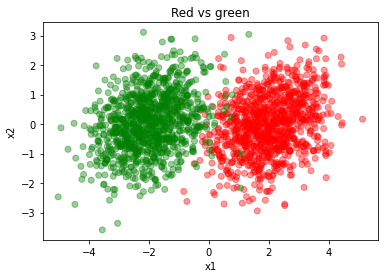

In [ ]:
# Visualization of the
_ =plt.scatter(x = data["x1"], 
            y = data["x2"], 
            color = ["red" if target==1 else "green" for target in list(data["target"])],
            alpha=0.4)

_ = plt.xlabel("x1")
_ =plt.ylabel("x2")
_ =plt.title("Red vs green")

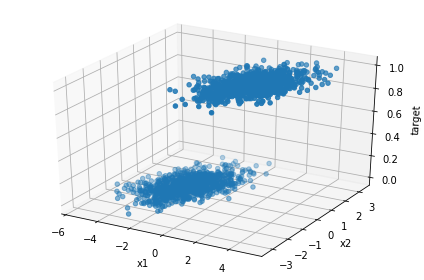

In [ ]:
# Another visualization of the data

threedee = plt.figure().gca(projection='3d')
threedee.scatter(data.x1, data.x2, data.target)
threedee.set_xlabel("x1")
threedee.set_ylabel("x2")
threedee.set_zlabel("target")
plt.tight_layout()
plt.show()
# linearly separable, don't you think?

In [ ]:
# Fitting the least square model, approach #1
data["intercept"] = 1
x = data[["x1", "x2", "intercept"]].values
targets = data["target"].values
parameters, residuals, rank, singular_values = np.linalg.lstsq(x,targets, rcond=None)
yhat= np.dot(x,parameters.T)
# The classification is made by assigning the closest class using Euclidean distance
predictions = []
for predicted_y in yhat:
  row = []
  row.append((predicted_y-0)**2)
  row.append((predicted_y-1)**2)
  predictions.append(row)

predictions = np.asarray(predictions)
predicted_classes = np.argmin(predictions, axis=1)

In [ ]:
print(f"Model output: {yhat[:5]},\n True class: {targets[:5]}")
print(f"Model predictions (first and last): {predictions[0]}, {predictions[-1]}")
print(f"Processed predicted classes: \
{predicted_classes[0]}, {predicted_classes[-1]}")

Model output: [1.03738708 0.95108736 0.72283678 0.87095624 1.1525645 ],
 True class: [1. 1. 1. 1. 1.]
Model predictions (first and last): [1.07617196 0.00139779], [0.0368531  1.42079634]
Processed predicted classes: 1, 0


We got the model and the predicted classes. Notice that it has been necessary to compute the distance (euclidean) between the output of the model and the two possible classes in order to assign the closest class.
Next we will define metrics for goodness of fit, namely:


*   $Accuracy=\frac{TP+TN}{(TP+TN+FP+FN)}$
*   $Error=1-Accuracy$
*   $Precision=\frac{TP}{(TP+FP)}$
*   $Recall=\frac{TP}{(TP+FN)}$

These metrics are computed from a confussion table.

![Confussion table](https://miro.medium.com/max/712/1*Z54JgbS4DUwWSknhDCvNTQ.png)

In [ ]:
tp = np.sum((predicted_classes == targets) & (targets == 1) & (predicted_classes == 1))
fp = np.sum((predicted_classes != targets) & (targets == 0) & (predicted_classes == 1))
tn = np.sum((predicted_classes == targets) & (targets == 0) & (predicted_classes == 0))
fn = np.sum((predicted_classes != targets) & (targets == 1) & (predicted_classes == 0))
print(f"TP: {tp}") 
print(f"TN: {tn}")
print(f"FN: {fn}") 
print(f"FP: {fp}")
# pd.crosstab(predicted_classes,targets)

def accuracy(predicted, y):
  return np.sum(predicted==y) /len(y)

def precision(predicted, y):
  tp = np.sum((predicted == y) & (y == 1) & (predicted == 1))
  fp = np.sum((predicted != y) & (y == 0) & (predicted == 1))
  return tp / (tp+fp)


def recall(predicted, y): # sensitivity
  tp = np.sum((predicted == y) & (y == 1) & (predicted == 1))
  fn = np.sum((predicted != y) & (y == 1) & (predicted == 0))
  return tp / (tp+fn)
  

TP: 975
TN: 985
FN: 25
FP: 15


In [ ]:
least_squares_acc = (tp+tn)/(tp+tn+fp+fn)
print(f"Least squares accuracy: {least_squares_acc}")
print(f"Recall (sensibility): {recall(predicted_classes, targets)}")
print(f"Precision: {precision(predicted_classes, targets)}")


Least squares accuracy: 0.98
Recall (sensibility): 0.975
Precision: 0.9848484848484849


The receiver operator curve provides information about the quality of the classifier even in unbalanced datasets. It works by plotting the true positive (sensitivity) rate vs the false positive rate (1-specificity) It can help us to compare different classification models. If the used model provides a probabilistic response or a score, it is possible to get the ratios at different thresholds in order to get the behaviour of the model.
In order to "read" the plot we need to have clear the following things:
- Perfect classifier scores at (1.0,1.0).
- A random classifier scores at the diagonal line from (0,0) to (1.0,0)
- Closer to the top left corner, the better.

From the ROC curve it is posible to extract the *Area Under the Curve* (AUC), an statistic that can help to compare models. This only makes sense in the case of probabilistic models or does that provide an score. 
In the case of our least regression model for classification, it outputs just the class, not the probability to be a member of the class, so our ROC is just one point.

In [ ]:
# Receiver operator curve (sensibility vs 1-specificity)
true_positive_rate = recall(predicted_classes, targets) # Ratio true positive vs all the real positives
# specificity = tn/(tn+fp)
false_positive_rate = fp/(tn+fp) # Ratio false positive vs all the real 
# (1-specificity) positives, it indicates how much positives were missclassified
print(f"True positive rate: {true_positive_rate}")
print(f"False positive rate: {false_positive_rate}")

tpr = np.array([0, true_positive_rate, 1])
fpr = np.array([0, false_positive_rate, 1])

True positive rate: 0.975
False positive rate: 0.015


No handles with labels found to put in legend.


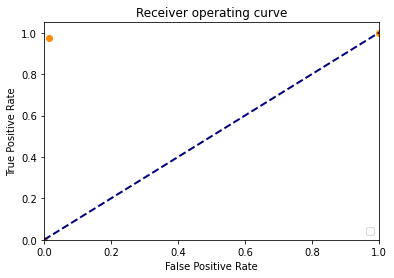

In [ ]:
from sklearn.metrics import auc
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.scatter(
    fpr,
    tpr,
    color="darkorange",
    # label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating curve")
plt.legend(loc="lower right")
plt.show()


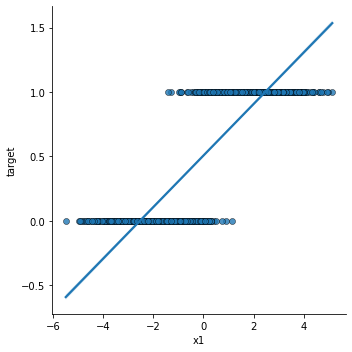

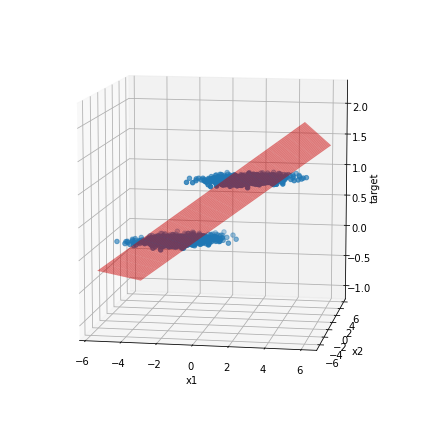

In [ ]:
sns.lmplot(data=data,
                x="x1", 
                y="target", 
                fit_reg=True,
                legend=True,
                palette={0: "#FF9999", 1: "#FFE888"},
                scatter_kws=dict(edgecolor="k", linewidth=0.5))
plt.show()

X,Y = np.meshgrid(np.arange(np.min(x)-1, np.max(x), 0.5)+1, np.arange(np.min(x)-1, np.max(x)+1, 0.5))
XX = X.flatten()
YY = Y.flatten()
Z = parameters[0]*X + parameters[1]*Y + parameters[2]
ax_threedee = plt.figure(figsize=(6,6)).gca(projection='3d')
ax_threedee.scatter(data.x1, data.x2, data.target)
ax_threedee.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.5, color="red")
ax_threedee.set_xlabel("x1")
ax_threedee.set_ylabel("x2")
ax_threedee.set_zlabel("target")
ax_threedee.view_init(elev=10., azim=-80)
plt.tight_layout()
plt.show()

In [ ]:
#Adapted nice 3d interactive graph from 
#http://inversionlabs.com/2016/03/21/best-fit-surfaces-for-3-dimensional-data.html
# Import plotly package
import plotly
import plotly.graph_objs as go

# Check ploltly version
plotly.__version__

# plot points and fitted surface using Plotly
trace1 = go.Scatter3d(
    x=x[:,0],
    y=x[:,1],
    z=targets,
    mode='markers',
    marker=dict(size=4, color='red', line=dict(color='black', width=0.5), opacity=0.8)
)

trace2 = go.Surface(z=Z, x=X, y=Y, colorscale='RdBu', opacity=0.999)

# Package the trace dictionary into a data object
data_test1 = go.Data([trace1, trace2])

# Dictionary of style options for all axes
axis = dict(
    showbackground=True, # show axis background
    backgroundcolor="rgb(204, 204, 204)", # set background color to grey
    gridcolor="rgb(255, 255, 255)",       # set grid line color
    zerolinecolor="rgb(255, 255, 255)",   # set zero grid line color
)

# Make a layout object
layout = go.Layout(
    title='1st-order (linear) plane', # set plot title
    scene=go.Scene(  # axes are part of a 'scene' in 3d plots
        xaxis=go.XAxis(axis), # set x-axis style
        yaxis=go.YAxis(axis), # set y-axis style
        zaxis=go.ZAxis(axis)),  # set z-axis style
)

# Make a figure object
fig = go.Figure(data=data_test1, layout=layout)
fig.show()

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:40: DeprecationWarning: plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.

  DeprecationWarning,
/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:550: DeprecationWarning: plotly.graph_objs.XAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.XAxis
  - plotly.graph_objs.layout.scene.XAxis

  DeprecationWarning,
/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:578: DeprecationWarning: plotly.graph_objs.YAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.YAxis
  - plotly.graph_objs.layout.scene.YAxis

  DeprecationWarning,
/usr/local/lib/python3.7/dist-packages/p

**Question 1: Althought the high accuracy of the method, can you give two reasons on why this model is a bad approximation for the data?**

*Hint - Think about:* 
1. *Predictions as probabilities.*
2. *The $[0,1]$ range.*
3. *Effect of outliers.*
4. *The general case of K classes*

El problema que se desea resolver consiste en identificar el color de un punto en función de su posición en el espacio bi-dimensional ( coordenadas x e y ). Por lo tanto, es un problema de clasificación. 
Aunque con el método utilizado se ha conseguido una buena precisión, este modelo no es una buena aproximación de los datos, ya que se está adaptando un regresor lineal a un clasificador. Debido a que nuestro output es solo una clase y no una probabilidad, no podemos determinar al curva ROC ni su área, lo que nos limita a la hora de comparar modelos.
Por otra parte, cómo para realizar la clasificación medimos la distancia minima al hiperplano definido por los centros de las clases, todos aquellos puntos que se encuentren a la misma distancia (los outliers), no podrán ser classificados correctamente, dando lugar a la mayor parte de errores, pues en esta zona, el método pierde utilidad.

### Fisher's linear discriminant
Luckily we can do better (or more naturally than least squares) with other methods. One of these methods is the Fisher linear discriminant (FLD) also known as the Linear Discriminant Analysis method (LDA).

FLD, similarly to PCA, projects the data into an hyperplane but taking into account to maximize the separation between classes. Moreover, thanks to the projection, the input space dimension $D$ is reduced to $D'$.

In order to do so, the simplest decision is to choose the vector means for each class (i.e: a vector where each component corresponds to the mean value of each feature with respect to each of the classes) and find the $w$ that maximizes the distance between them when doing the projection: $m_2-m_1 = w^T(m_2-m_1)$.
Because the scale of the means depends on the data, it is necessaray to constrain its magnitude as $\sum_i^nw_i^2=1$.

We can also have the problem of overlapping data points from different classes on the projection, this problem can be detected when checking the nondiagonal values of the covariance matrix.
The idea of the Fisher method is to maximize a function that gives a large separation between the projected class means while also giving a small variance within each class doing so the classes are kept separated in the projection. The steps to accomplish this are:
0. Compute the mean vectors.
1. Project the data into an hyperplane: $y=w^Tx$
2. Compute within-class variance of the transformed data $y_k$: $s_k^2=\sum_{j\in{C_k}}^K(y_j-m_k)$
3. Compute the Fisher criterion as the ratio of the between-class variance to the within-class variance: $J(w)=\frac{(m_2-m_1)^2}{s_1^2+s_2^2}$
4. Rewrite the Fisher criterion adding the weights: $s_1^2+s_2^2$ is the simplest choice for the total within-class variance for the whole data set.
Using the equations above we can rewrite the Fisher criterion as $J(w)=\frac{w^TS_Bw}{w^TS_ww}$ where $S_B=(m_2-m_1)(m_2-m_1)^T$ is the between-class covariance matrix and $S_w=\sum_{n\in{C_1}}(x_n-m_1)(x_n-m_1)^T+\sum_{n\in{C_2}}(x_n-m_2)(x_n-m_2)^T$ is the within-class covariance matrix.
Now we can differentiate with respect to the vector $w$ and find that $J(w)$ is maximized when: 
> $$(w^TS_Bw)S_ww=(w^TS_ww)S_Bw$$

Notice that $S_Bw$ is always in the direction of $m_2-m_1$, and that we don't need to care about the magnitude of $w$, only its direction, so we can drop the scalar factors $(w^TS_Bw)$ and $(w^TS_ww)$. Multiplying both side of $J(w)$ by $S_w^{-1}$ we obtain:


> $$w=S_W^{-1}(m_2-m_1)$$

$w$ (the projection to our data) is directly proportional to the inverse of the within-class covariance matrix multiplied by the difference of the class means, accomplishing that the projected data has a large distance between classes (difference of the means) and a small variance within classes.

The last step is to define a method to decide the class of the observations. We could use an arbitrary threshold value (i.e 0.5) but it turns out that we can find the best threshold by using probabilities, specifically the posterior probability $p(y|C_k)$.

Once we have the data projected, we can model the class-conditional densities $p(y|C_k)$ using Gaussian distributions and then set up the optimal threshold that separates the classes.

When dealing with multiple classes what we need is to use generalized forms of each of the equations presented in the 2 classes form:


> $$S_W=\sum_{k=1}^KS_k$$

> $$S_k=\sum_{n\in{C_k}}(x_n-m_k)(x_n-m_k)^T$$

> $$S_B=\sum_{k=1}^KN_k(m_k-m)(m_k-m)^T$$

> $$W=max_{D'}(eig(S_W^{-1}S_B))$$ where $D'$ are the largest eigenvectors from the multiplication of the inverse within-class covariance multiplied by the between-class covariance. The number of eigenvectors to take is arbitrary (usually 2).


At this point, we have the data projected into a lower dimensional space, now, in order to discriminate between classes, we assign each observation to the Gaussian distribution that generated it by computing the likelihood of being generated by the distribution of the class A and by the class B. The largest one is the class to be assigned as the one that generated the observation.

In practice, what be need to know (or assume) in order to expect good results from *Fisher's linear discriminant* is:
1. Data holds the assumption of Gaussianity.
2. Use LDA if we know that the population covariance matrix is isotropic (the covariance matrix is proportional to the identity matrix, i.e: all elements in the diagonal are equal and the elements off-diagonal are 0). If not, we can try to use *quadratic discriminant analysis (QDA)* method.

Further information about LDA can be found [here](https://sthalles.github.io/fisher-linear-discriminant/).


In [ ]:
# LDA example
# 1. Within class covariance matrix
# Remember x_red is class one (assigned a 1) and x_green is class two (0).
m_red = np.mean(x_red, axis=0)
m_green = np.mean(x_green, axis=0)
# np.dot(np.subtract(x_red,m_red), np.subtract(x_red,m_red).T)
# np.dot(np.subtract(x_red,m_green), np.subtract(x_red,m_green).T)
covar_red = np.dot((x_red-m_red).T, x_red-m_red)/n
covar_green = np.dot((x_green-m_green).T, x_green-m_green)/n
total_within_covariance =  (covar_red + covar_green)/2

# Objective function
w = np.linalg.inv(total_within_covariance).dot(m_red - m_green)
print(f"Total within classes covariance: \n {total_within_covariance}")
print(f"===Model parameters==== \n {w} \n\n")

# Project the data
projected_data = np.dot(x[:,:2], w)
projected_data_red = np.dot(x_red, w)
projected_data_green = np.dot(x_green, w)

#### Building the discriminant
# Compute the gaussian distribution for the projected data for each class
p_mean_red = np.mean(projected_data_red, axis=0)
p_mean_green = np.mean(projected_data_green, axis=0)
p_cov_red = np.cov(projected_data_red, rowvar=False)
p_cov_green = np.cov(projected_data_green, rowvar=False)

# Prior class probability (probability of being of class k) P(Ck)
prior_class_red = len(projected_data_red) / len(projected_data)
prior_class_green = len(projected_data_green) / len(projected_data)

#Compute the class conditional densities, that is the probability of x to be
#of class Ck (P(x|Ck)). This can be obtained using Bayes theorem.
def multivariate_gaussian_distribution(x, mu, cov):
  first_part = (1./(2.*np.pi)**(len(x.shape)/2.)) * (1/np.sqrt(np.linalg.det(cov)))
  x_sub_mu = np.subtract(x, mu)
  return first_part * np.exp(-np.dot(1/2,x_sub_mu).dot(np.linalg.inv(cov).dot(x_sub_mu)))

def univariate_gaussian_distribution(x, mu, std):
  first_part = 1./np.sqrt(2.*np.pi*std**2)
  x_sub_mu = np.subtract(x, mu)
  return first_part*np.exp(-np.divide(x_sub_mu**2,2*std**2))

"""
As said, in order to classify the observations, we take each one and use it to 
find its likelihood to be of class red or class green. This is as easy as use 
the observation as input for the function that defines the red and green classes.
The probability of the observation to belong to one or the other class is then
multiplied by the probability of that class in the dataset (in our case, equal
probability for each class, that is 50%). In a Bayesian approach we can think
of the probabilities of the classes as the prior probability, and the likelihoods
as the conditional probability of the observation belonging to a class given the
probability of that class.
Once we have this, then choosing the highest one of the two probabilities 
(two classes) gives us the class for the observation.
"""
gaussian_likelihoods = []  
for p in projected_data:
  row = []
  if projected_data.ndim==1:
    # univariate case
    row.append(prior_class_green*univariate_gaussian_distribution(p, p_mean_green, p_cov_green))
    row.append(prior_class_red*univariate_gaussian_distribution(p, p_mean_red, p_cov_red))
  else:
    # multivariate case
    row.append(prior_class_green*multivariate_gaussian_distribution(p, p_mean_green, p_cov_green))
    row.append(prior_class_red*multivariate_gaussian_distribution(p, p_mean_red, p_cov_red))
  gaussian_likelihoods.append(row)

gaussian_likelihoods = np.asarray(gaussian_likelihoods)
predictions = np.argmax(gaussian_likelihoods, axis=1)
predicted_classes = np.argmin(predictions)


Total within classes covariance: 
 [[0.94284024 0.28666879]
 [0.28666879 1.01185186]]
===Model parameters==== 
 [ 4.64373295 -1.38285017] 




In [ ]:
lda_accuracy = accuracy(predictions, targets)
print(f"Accuracy of the lda method is: {lda_accuracy}")

Accuracy of the lda method is: 0.9805


Use the following comment in order to get the index of the misclassified observations:
```
np.where(predictions!=targets)
```
**Question 2: Can you guess why are they misclassified?**


Aunque ahora el threshhold del modelo es más preciso que utilizando el regresor lineal, sigue siendo un parámetro que se calcula por probabilidad, pues se tiene en cuenta la probabilidad a priori y la probabilidad dentro de la distribución normal de cada clase. Como nunca se va a conseguir una probabilidad a posteriori igual a uno, el clasificador siempre va a tener una probabilidad de error.

In [ ]:
#Code here (if needed)
np.where(predictions!=targets)



(array([  39,   86,   93,  103,  110,  121,  162,  196,  257,  272,  277,
         337,  412,  441,  450,  476,  687,  691,  697,  746,  825,  931,
         960,  961, 1080, 1098, 1100, 1239, 1474, 1541, 1605, 1735, 1738,
        1752, 1759, 1773, 1821, 1847, 1956]),)

It has been  observed that the prior probability of belonging to each of the classes is 0.5.

**Question 3: Why do you think this happens?**
La probabilidad a priori consiste en analizar que probabilidad tiene un dato de pertenecer a una clase u otra según la cantidad de datos que hay en el dataset. Pues cómo hay la misma cantidad de muestras verdes y rojas, la probabilidad a priori de ser una clase u otra es del 50%.


A dimensional reduction has been made.

**Question 4: What is the number of dimensions of the projected data?**

Con la reducción dimensional se ha pasado de una proyección en dos dimensiones (FOTO DEL GRAFICO DE DISTRIBUCION INICIAL) a una proyección que se extiende en una dimension (FOTO DEL GRAFICO TARGET CON RECTA EN LA DIAGONAL).

**Question 5: Provide the posterior probability for the following projected observations:**

21,-21, 5, -5, 1, -1



In [ ]:
#Code here (if needed)
projected_data2 = np.array([21,-21, 10, -10, 1, -1])
gaussian_likelihoods2 = []
for p in projected_data2:
  row = []
  if projected_data.ndim==1:
    # univariate case
    row.append(prior_class_green*univariate_gaussian_distribution(p, p_mean_green, p_cov_green))
    row.append(prior_class_red*univariate_gaussian_distribution(p, p_mean_red, p_cov_red))
 
    gaussian_likelihoods2.append(row)

gaussian_likelihoods2 = np.asarray(gaussian_likelihoods)

gaussian_likelihoods2



array([[0.00451732, 0.01011924],
       [0.00781345, 0.01040265],
       [0.00798276, 0.01034538],
       ...,
       [0.01032247, 0.00458736],
       [0.00974821, 0.00376481],
       [0.01084088, 0.00641742]])

**Question 6: Plot the roc curve for the LDA model**

In [ ]:
gaussian_likelihoods
# Receiver operator curve (sensibility vs 1-specificity)
true_positive_rate = accuracy(predictions, targets) # Ratio true positive vs all the real positives
# specificity = tn/(tn+fp)
false_positive_rate = 1-true_positive_rate # Ratio false positive vs all the real 
# (1-specificity) positives, it indicates how much positives were missclassified
print(f"True positive rate: {true_positive_rate}")
print(f"False positive rate: {false_positive_rate}")

tpr = np.array([0, true_positive_rate, 1])
fpr = np.array([0, false_positive_rate, 1])

True positive rate: 0.9805
False positive rate: 0.019499999999999962


No handles with labels found to put in legend.


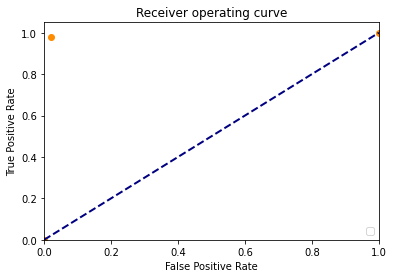

In [ ]:
from sklearn.metrics import auc
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.scatter(
    fpr,
    tpr,
    color="darkorange",
    # label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating curve")
plt.legend(loc="lower right")
plt.show()

## Perceptron
![Perceptron](https://drive.google.com/uc?id=1ePH0NUb1zT2vueO8LKNFJCJ8kgjihbPL)

The perceptron of Rosenblatt (1962) settled the bases for the now so popular Deep Neural Network models.
It consists in a two-class model in which the input vector $x$ is transformed using a nonlinear transformation in order to obtain a feature vector $\phi(x)$


> $$y(x) = f(w^T\phi(x))$$

usually, $\phi(\cdot)$ is the sigmoid function, and $f(\cdot)$ is the step function:


> $$f(a)=\begin{cases}
       \text{+1, } &\quad a\ge0 \\\\
       \text{-1, } &\quad a\lt0 
     \end{cases}$$

The idea is to preprocess the data with the activation function and then assign a value in such a manner that can be interpreted as an imitation of the firing of a neuron. 
The vector $\phi(x)$ includes a bias component $\phi_0(x)=1$ and notice that for this method, the target values need to be +1 for class $C_1$ and -1 for class $C_2$.

The learning algorithm (also known as the loss function or objective function) is known as the perceptron criterion and consists in minimizing the quantity $-w^T\phi(x_n)y_n$ for those observations misclassified and a quantity of 0 for the well classified ones. Think about it, because or targets are just a change of sign (-1 and +1), what is desired is that all patterns satisfy the inequation $w^T\phi(x_n)>0$.


> $$L_p(w)=-\sum_{n\in{M}}w^T\phi(x_n)t_n$$, where $M$ denotes the set of all misclassified observations.

Using this criterion, the contribution to the error associated with a particular misclassified pattern is a linear function of $w$ in regions of the $w$ space and zero when is correctly classified. At this point, we can use an optimization algorithm like the stochastic gradient descent (SGD).


> $$w^{\tau+1}=w^\tau-\eta\nabla E_p(w)$$, where $\eta$ is the learning rate of the SGD algorithm and $\tau$ the index that represents the current iteration of the SGD algorithm. $\eta=1$ is commonly used because it makes easier the computations without losing generalization.

The perceptron learning algorithm has a simple interpretation: each observation is evaluated and if it is classified correctly, nothing happens. If it is misclassified then the observation is used in order to estimate the weight vector, if the observation is of class 1 the observation is added to the vector weight but if it is of class -1, then it is subtracted. By changing the weight vector, correctly classified observations can be turned to misclasified ones, but, there are proofs that if the dataset is linearly separably, the perceptron converges towards the optimal solution in a finite number of steps. Take into account that there can exists an infinite number of solutions (depends on the initialization values of the parameters) or none if the data is not linearly separable.






Mean accuracy: 0.996265 after 100 iterations


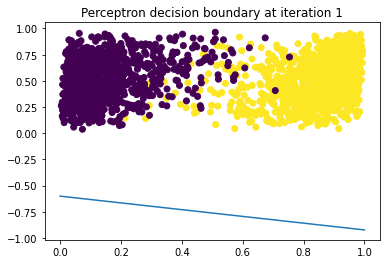

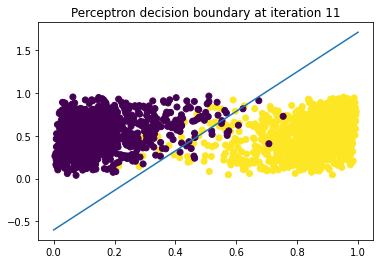

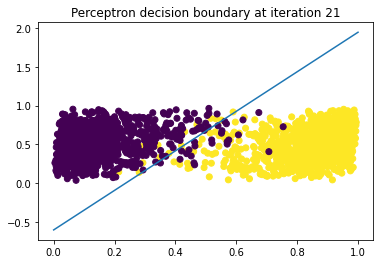

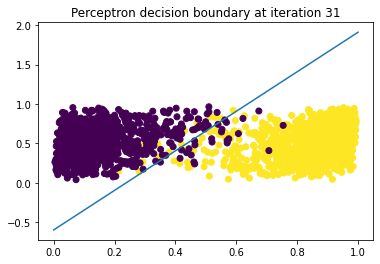

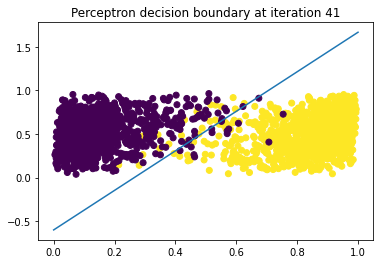

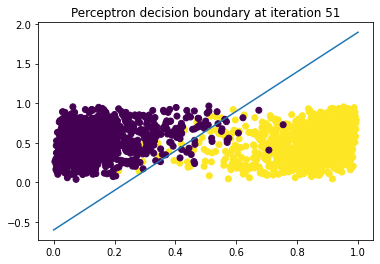

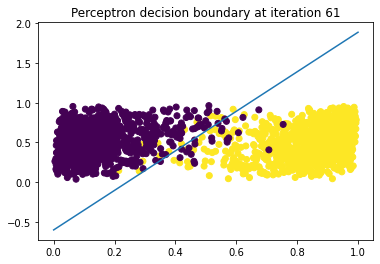

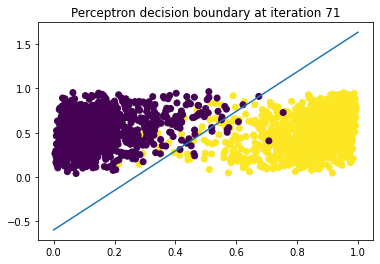

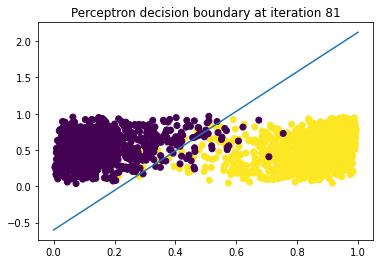

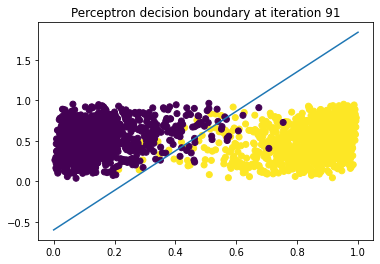

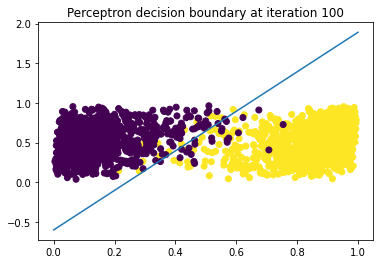

In [ ]:
perceptron_targets = np.vstack((np.full((n,1),1), np.full((n,1),-1)))
sigmoid_function = lambda x: np.divide(1,1+np.exp(-x))
feature_vectors = sigmoid_function(x[:,:2])
feature_vectors = np.hstack((feature_vectors, np.ones((len(feature_vectors),1))))
init_weights = np.random.uniform(0,1, (feature_vectors.shape[-1],1))
weights = init_weights
mean_accuracy = []
n_iter = 100
for i in range(n_iter):
  perceptron_predictions = []
  for fv, pt in zip(feature_vectors, perceptron_targets):
    fv = fv.reshape(-1,1)
    if np.dot(weights.T,fv) >= 0:
      t = 1
    else:
      t = -1
    if t == pt:
      pass
    else:
      if pt == 1:
        weights = weights + fv
      else:
        weights = weights - fv
    perceptron_predictions.append(t)
  perceptron_predictions = np.asarray(perceptron_predictions).reshape(-1,1)
  perceptron_accuracy = accuracy(perceptron_predictions, perceptron_targets)
  mean_accuracy.append(perceptron_accuracy)

  # print(f"Iteration {i} - Accuracy: {perceptron_accuracy}")
  # Plotting the Perceptron decision boundary at each 10 iterations
  # explanations from
  # http://hagan.okstate.edu/4_Perceptron.pdf
  if i % 10 == 0 or i ==99:  
  #   # The decision boundary is defined by those observations that their dot 
  #   # product with the weight vector is always the same (-b). These points lie
  #   # in a line orthogonal to the weight vector. We can define this line using
  #   # points that intersect the axis of the space defined by an orthogonal 
  #   # vector to the vector of weights.
    fig, ax = plt.subplots()
    scale_x = np.array([0,1])
    y_boundary = -(weights[0]/weights[1])*scale_x - 0.6
    plt.scatter(feature_vectors[:,0],feature_vectors[:,1], c=perceptron_targets[:,-1])
    plt.plot(scale_x, y_boundary)
    ax.set_title(f"Perceptron decision boundary at iteration {i+1}")

  if perceptron_accuracy >= 1.:
    print("="*30)
    print("Converged")
    break
print(f"Mean accuracy: {np.mean(mean_accuracy)} after {n_iter} iterations")

### Perceptron exercice
**Question 7: Why the perceptron is incapable of solve the XOR problem?** (Use the link at the bottom of this text box for a graphical help).

![XOR table](https://miro.medium.com/max/600/0*LYlt6CZJHOJkNRHJ.)

**Question 8: Explain how we can modify the perceptron in order to solve it.**

*For both questions use this [Perceptron XOR](https://playground.tensorflow.org/#activation=sigmoid&batchSize=10&dataset=xor&regDataset=reg-plane&learningRate=1&regularizationRate=0&noise=0&networkShape=1&seed=0.88942&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false). Clicking on it you will get the visualization of a perceptron on the XOR problem (all that you need for the first question, just push the play button).* 

*For the second question you can modify the hyperparameters in order to find what makes possible that the Perceptron solves the XOR problem. Think in how these hyperparameters values affect the capacity and complexity of the model.*




Un perceptron es la unidad computacional de una red neuronal, pues en el se raliza un calculo simple (peso por entrada + bias) y el resultado pasa por una función de activación. En el caso presentado, se puede observar como un solo perceptron es capaz de definir la frontera entre dos clases mediante una recta. 

En el caso de la puerta XOR su distribución de datos es:
FOTO XOR
Para clasificar o definir sus fronteras se necesitan dos rectas, algo que un solo perceptrón no puede conseguir.
Si modificamos algunos hiperparametros de la red: 2 capas, 4 y 2, f act sigmoid. Obtenemos la clasificacion deseada



**Question 9: What is the effect of the sigmoid function and why it is applied as a preprocessing?.**

Hint: $\sigma(x)=\frac{1}{1+\exp^{-x}}$

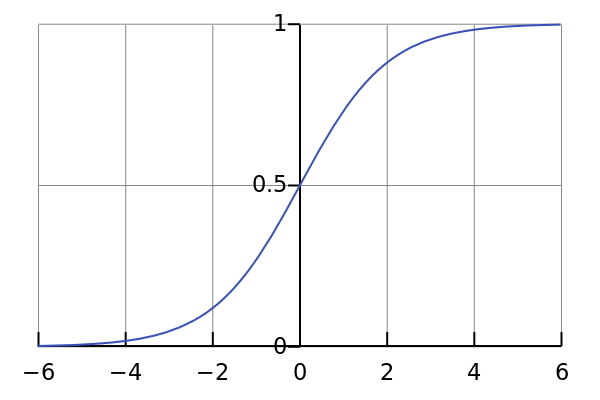

La función sigmoidal se encarga de estandarizar el resultado del caclulo de un perceptrón. Pues a resultados grandes y negativos le asignara un cero, a resultados grandes y positivos le asignara un 1 y a resultados cercanos a cero le asignara un valor entre 0 y 1 siguiendo la curva de la función. Gracias a esto, los valores frontera quedan ponderados con una probabilidad y los valores más leganos (más seguros) se les asignan probabildades absolutas (0 o 1).

**Question 10: Is the perceptron a good candidate for classification problems with more than two classes? Why?**



Como se ha comentado en la cuestión 7, siempre y cuando se necesite más de una frontera paraclasificar un conjunto de datos, el perceptrón no es un buen candidato. Pues está limitado al cómputo de una frontera de separación óptima. Utilizando varios perceptrones sí que es posible obtener clasificaciónes más complejas.



**Question 11: Enumerate 4 limitations of the perceptron.**

*Hint: Some of them have been already discussed*

- Solo puede obtener una recta óptima
- Algoritmo iterativo
- Tiempo
- Consumo

**Question 12: Plot the ROC curve.**

In [ ]:
true_positive_rate = np.mean(mean_accuracy) # Ratio true positive vs all the real positives
# specificity = tn/(tn+fp)
false_positive_rate = 1-true_positive_rate # Ratio false positive vs all the real 
# (1-specificity) positives, it indicates how much positives were missclassified
print(f"True positive rate: {true_positive_rate}")
print(f"False positive rate: {false_positive_rate}")

tpr = np.array([0, true_positive_rate, 1])
fpr = np.array([0, false_positive_rate, 1])

True positive rate: 0.996265
False positive rate: 0.003735000000000044


No handles with labels found to put in legend.


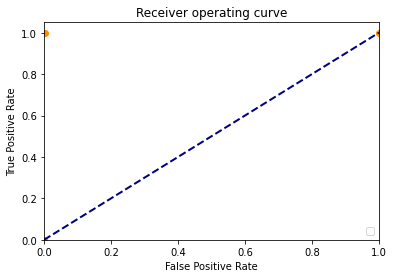

In [ ]:
from sklearn.metrics import auc
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.scatter(
    fpr,
    tpr,
    color="darkorange",
    # label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating curve")
plt.legend(loc="lower right")
plt.show()

**PREGUNTA 13**


El modelo LDA y el modelo basado en perceptrón son modelos lineales porque las fronteras de decisión que utilizan son funciones lineales del vector de entradas.